# Tarea 2: Reconocimiento de patrones y aprendizaje automatizado
### Avendaño García Erick Giovanni

## Ejercicio 1
El conjunto de datos Sign Language MNIST contiene 34,627 imágenes de la lengua de signos
americana que representan 24 de 26 letras del abecedario (0=A, 1=B, ..., 24=Y, 25=Z). La letra J y Z (clases 9 y 25) se omitieron del conjunto de datos porque requieren movimiento para representarlas. Cada imagen de 28x28 píxeles está representada por un vector de 784 píxeles. Cada píxel puede tomar uno entre 256 tonos de gris, donde 0 es negro absoluto y 255 es blanco absoluto. Todos los vectores tienen asociada una etiqueta que indica el dígito escrito en la imagen.

Más información acerca del conjunto de datos aquí. El objetivo de este ejercicio es construir un
clasificador que permita identificar la letra a la que corresponde la información de cada imagen.

### a) Cargue el archivo sign mnist.csv y divida el conjunto de datos en Entrenamiento (≤ 60 %), Calibración (≤ 15 %) y Prueba (≤ 25 %).

In [1]:
import pandas as pd

# Cargar los archivos CSV
train_data = pd.read_csv("/Users/erickavendanogarcia/Downloads/sign_mnist_train.csv")
test_data = pd.read_csv("/Users/erickavendanogarcia/Downloads/sign_mnist_test.csv")

In [2]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
# Separar características y etiquetas
X_train, y_train = train_data.iloc[:, 1:], train_data.iloc[:, 0]
X_test, y_test = test_data.iloc[:, 1:], test_data.iloc[:, 0]

In [5]:
#Dividir el conjunto de entrenamiento en entrenamiento y calibración
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [6]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,135,119,108,102,105,99,61,103,121,133,...,108,112,116,114,118,180,184,176,167,163
7168,157,159,161,164,166,166,171,174,175,176,...,213,213,213,214,213,211,210,210,209,208
7169,190,191,190,191,190,190,192,192,191,192,...,216,215,213,214,214,213,210,211,209,208
7170,201,205,208,209,214,216,218,223,226,229,...,112,169,255,255,237,113,91,67,70,63


### b) ¿Cuáles son las ventajas y desventajas de utilizar las estrategias one-vs-one o one-vs-all para integrar cada clasificador binario en un clasificador multiclase usando regresión logística? Implemente un clasificador binario para Sign Language MNIST con la estrategia de su elección.

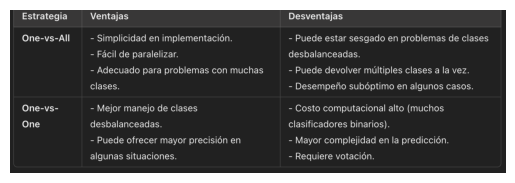

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen
img = mpimg.imread('/Users/erickavendanogarcia/Downloads/tabla.png')  

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Desactivar los ejes
plt.show()


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(LogisticRegression())

In [8]:
# Entrenar el clasificador en el conjunto de entrenamiento
ovr_clf.fit(X_train, y_train)

/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

OneVsRestClassifier(estimator=LogisticRegression())

In [9]:
X_test.iloc[1]

pixel1      126
pixel2      128
pixel3      131
pixel4      132
pixel5      133
           ... 
pixel780    184
pixel781    184
pixel782    184
pixel783    182
pixel784    180
Name: 1, Length: 784, dtype: int64

In [42]:
ovr_clf.predict([X_test.iloc[1]])

/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Logist

array([5])

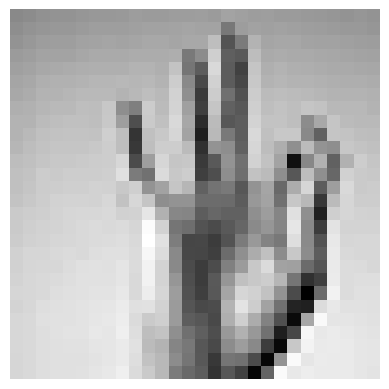

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar la primera imagen del conjunto de prueba
image = X_test.iloc[1].values.reshape(28, 28)  # Convertir los datos de la imagen a una matriz 28x28

# Visualizar la imagen
plt.imshow(image, cmap='gray')  # Mostrar la imagen en escala de grises
plt.axis('off')  # Ocultar los ejes
plt.show()

### c) Usando los datos de entrenamiento, calcule una matriz de confusión multiclase y grafique los resultados en un mapa de calor.

In [12]:
y_pred_train = ovr_clf.predict(X_train)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred_train)

array([[1126,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0, 1144,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0, 1196,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,  957,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0, 1204,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

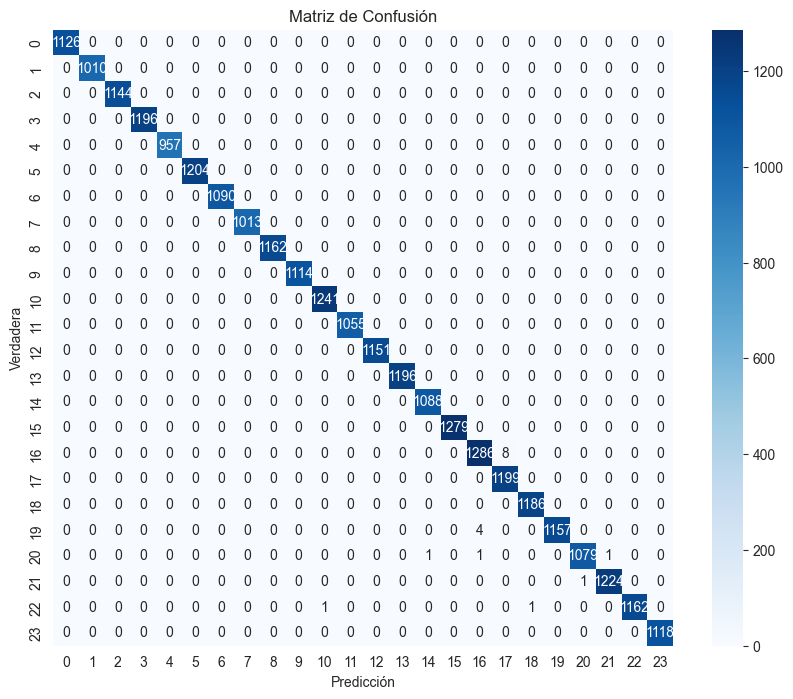

In [14]:
import seaborn as sns
# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadera')
plt.title('Matriz de Confusión')
plt.show()

### d)  Evalúe el rendimiento del clasificador usando los datos de prueba:

#### 1) Obtenga la matriz de confusión multiclase final para el clasificador considerando las 24 clases. Muestre los resultados en un mapa de calor.

In [15]:
y_pred = ovr_clf.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[327,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 394,   0,   9,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,  26,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0, 270,   0,   0,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  19,   0,   0,   0],
       [  0,   1,   0, 186,   0,   0,   0,   0,   0,   3,   0,   0,  17,
          0,   0,   1,  37,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 445,   0,   0,   0,  15,   0,   0,   0,   0,
          0,   0,   0,   3,  35,   0,   0,   0,   0,   0,   0],
       [  0,   0,  10,  25,   0, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   5,   0,   0,   0,   7,   0,   0],
       [  0,   0,   0,   0,   0,   0, 300,  19,   0,   0,   0,   0,   0,
          0,   0,   7,   1,   0,  21,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  21,   0,  42

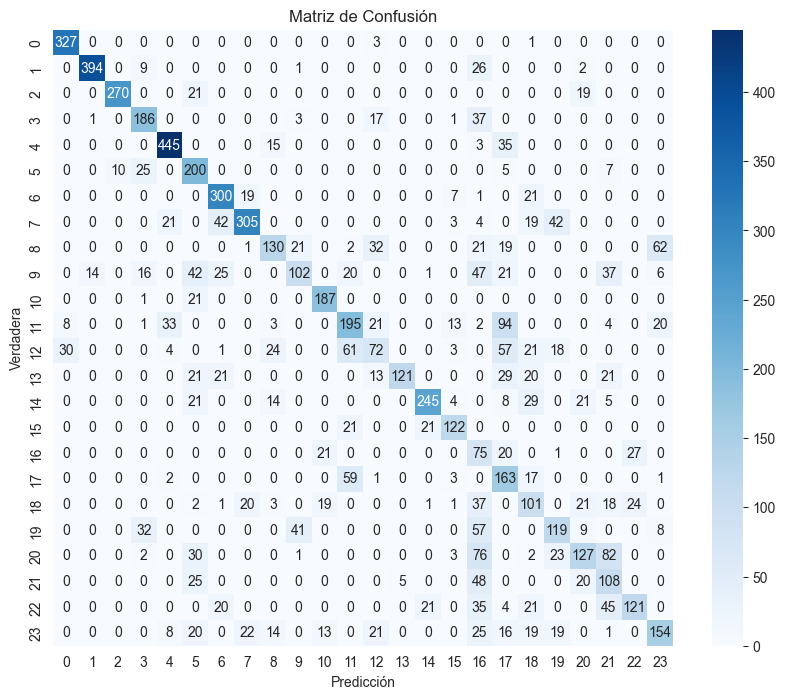

In [17]:
import seaborn as sns
# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadera')
plt.title('Matriz de Confusión')
plt.show()

#### 2) Calcule las métricas Micro-F1, Macro-F1, Weighted F1 y Average Accuracy del sistema.

In [18]:
# Calcular Micro-F1, Macro-F1 y Weighted-F1
from sklearn.metrics import f1_score, accuracy_score
micro_f1 = f1_score(y_test, y_pred, average='micro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

# Calcular la precisión promedio (Average Accuracy)
average_accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print(f"Micro-F1: {micro_f1:.4f}")
print(f"Macro-F1: {macro_f1:.4f}")
print(f"Weighted-F1: {weighted_f1:.4f}")
print(f"Average Accuracy: {average_accuracy:.4f}")

Micro-F1: 0.6371
Macro-F1: 0.6178
Weighted-F1: 0.6431
Average Accuracy: 0.6371


#### 3) Calcule la métrica Accuracy y grafique Precision y Recall en función de la letra que se considera la clase positiva.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcular la Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6370607919687674


In [20]:
# Calcular Precision y Recall por cada clase
precision = precision_score(y_test, y_pred, average=None)  # None devuelve el valor por clase
recall = recall_score(y_test, y_pred, average=None)

In [21]:
print("Precision:", precision, "Recall:", recall)

Precision: [0.89589041 0.96332518 0.96428571 0.68382353 0.86744639 0.49627792
 0.73170732 0.83106267 0.64039409 0.6035503  0.77916667 0.54469274
 0.4        0.96031746 0.84775087 0.7625     0.15182186 0.34607219
 0.37269373 0.53603604 0.57990868 0.32926829 0.70348837 0.61354582] Recall: [0.98791541 0.91203704 0.87096774 0.75918367 0.8935743  0.8097166
 0.86206897 0.69954128 0.45138889 0.3081571  0.89473684 0.49492386
 0.24742268 0.49186992 0.70605187 0.74390244 0.52083333 0.66260163
 0.40725806 0.44736842 0.36705202 0.52427184 0.45318352 0.46385542]


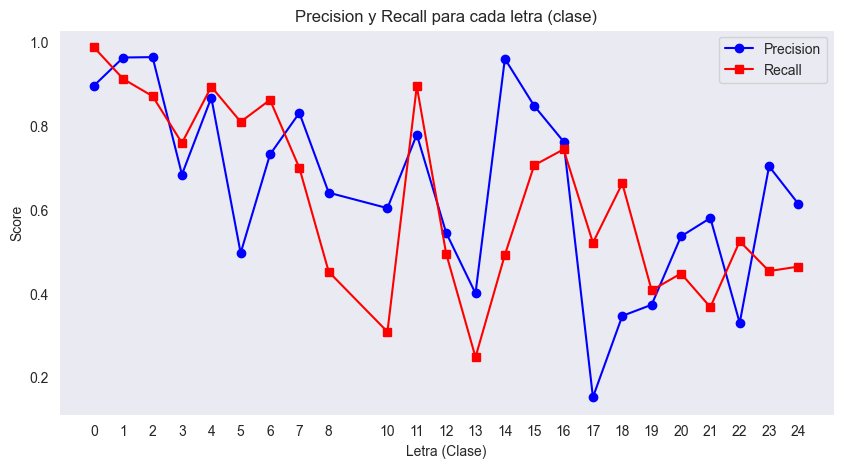

In [22]:
# Obtener etiquetas (números de las clases)
clases = np.unique(y_test)  # Obtiene las clases presentes en y_test

# Graficar Precision y Recall
plt.figure(figsize=(10, 5))
plt.plot(clases, precision, marker='o', linestyle='-', label='Precision', color='blue')
plt.plot(clases, recall, marker='s', linestyle='-', label='Recall', color='red')

# Etiquetas y título
plt.xlabel("Letra (Clase)")
plt.ylabel("Score")
plt.xticks(clases)  # Coloca las clases en el eje X
plt.title("Precision y Recall para cada letra (clase)")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

## Ejercicio 2
El objetivo de este ejercicio es construir una red neuronal para clasificar las imágenes del conjunto de datos Sign Language MNIST.

### a) Crea una red neuronal con neuronas binarias (perceptrón multicapa) capaz de realizar la clasificación de la actividad. Recuerda dividir los datos en subconjuntos de entrenamiento, calibración y prueba.

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=200, random_state=42)
mlp_clf.fit(X_train, y_train)
#Se entrena el modelo con X (El vector con la cantidad de píxeles) y "y" (las etiquetas del modelo).

MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42)

In [45]:
y_pred1 = mlp_clf.predict(X_test.iloc[[3]])  # Usar doble corchete para obtener un DataFrame (2D)

In [46]:
y_pred1

array([0])

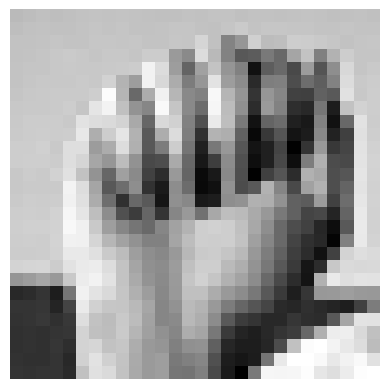

In [47]:
# Seleccionar la primera imagen del conjunto de prueba
image_1 = X_test.iloc[3].values.reshape(28, 28)  # Convertir los datos de la imagen a una matriz 28x28

# Visualizar la imagen
plt.imshow(image_1, cmap='gray')  # Mostrar la imagen en escala de grises
plt.axis('off')  # Ocultar los ejes
plt.show()

In [48]:
y_test_predmlp = mlp_clf.predict(X_test)

In [51]:
y_test_predmlp

array([ 6,  5, 10, ...,  2,  4,  2])

In [50]:
accuracy_test = accuracy_score(y_test, y_test_predmlp)

print(f"Precisión en prueba: {accuracy_test:.4f}")

Precisión en prueba: 0.6240


In [52]:
print(f"F1 score: {f1_score(y_test, y_test_predmlp, average='weighted')}")
print(f"Recall score: {recall_score(y_test, y_test_predmlp, average='weighted')}")
print(f"Precision score: {precision_score(y_test, y_test_predmlp, average='weighted')}")
print(f"Accuracy score: {accuracy_score(y_test, y_test_predmlp)}")

F1 score: 0.6253172265056881
Recall score: 0.6239542665923034
Precision score: 0.6515661399707159
Accuracy score: 0.6239542665923034


### b) Utilizando una muestra de los datos, determina el número óptimo de capas y neuronas por capa para este problema.

In [66]:
mlp_cl = MLPClassifier(max_iter=500)  # Reducido el número de iteraciones

parameter_space = {
    'hidden_layer_sizes': [(i, j) for i in range(5, 51, 5) for j in range(5, 51, 5)] ,  # Reducido el espacio de búsqueda
    'activation': ['relu'],  # Sólo 'relu' para reducir combinaciones
    'solver': ['adam'],  # Sólo 'adam' para reducir combinaciones
    'alpha': [0.0001],  # Reducido el número de valores
    'learning_rate': ['constant'],  # Sólo 'constant'
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_cl, parameter_space, n_jobs=-1, cv=2)
clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(5, 5), (5, 10), (5, 15),
                                                (5, 20), (5, 25), (5, 30),
                                                (5, 35), (5, 40), (5, 45),
                                                (5, 50), (10, 5), (10, 10),
                                                (10, 15), (10, 20), (10, 25),
                                                (10, 30), (10, 35), (10, 40),
                                                (10, 45), (10, 50), (15, 5),
                                                (15, 10), (15, 15), (15, 20),
                                                (15, 25), (15, 30), (15, 35),
                                                (15, 40), (15, 45), (15, 50), ...],
                         'learning_rate': ['constant'], 'solver': ['adam']})

In [67]:
print('Mejores parámetros:', clf.best_params_)

Mejores parámetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 45), 'learning_rate': 'constant', 'solver': 'adam'}


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# Usamos una muestra de los datos (puedes reducir el tamaño si es necesario)
X_train_sample = X_train[:1000]  # Seleccionamos una muestra de 1000 datos
y_train_sample = y_train[:1000]

mlp_cl = MLPClassifier(max_iter=500, solver='adam')  # Número de iteraciones reducido

# Espacio de búsqueda de hiperparámetros
parameter_space = {
    'hidden_layer_sizes': [(i, j) for i in range(5, 51, 5) for j in range(5, 51, 5)],  # Combinaciones de 5 a 50 neuronas
    'activation': ['relu', 'logistic'],  # Funciones de activación
    'alpha': [0.0001, 0.01],  # Regularización
    'learning_rate': ['constant', 'adaptive'],  # Tipos de tasa de aprendizaje
}

# RandomizedSearchCV para encontrar los mejores parámetros
clf = RandomizedSearchCV(mlp_cl, parameter_space, n_jobs=-1, cv=3, n_iter=10)
clf.fit(X_train_sample, y_train_sample)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {clf.best_params_}")
print(f"Mejor puntuación: {clf.best_score_}")


Mejores parámetros encontrados: {'learning_rate': 'constant', 'hidden_layer_sizes': (30, 15), 'alpha': 0.0001, 'activation': 'relu'}
Mejor puntuación: 0.07399315483147818


### c) Prueba con las funciones de activación paso y sigmoide.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [61]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Mejor configuración encontrada en la pregunta 2 (por ejemplo, 30 y 10 neuronas en 2 capas)
best_hidden_layer_sizes = (30, 15)

In [63]:
# Modelo con activación sigmoide
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,
                            activation='logistic',
                            solver='adam',
                            max_iter=500,
                            random_state=42)

In [64]:
# Entrenar el modelo con sigmoide
mlp_sigmoid.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 15), max_iter=500,
              random_state=42)

In [65]:
y_pred_sigmoid = mlp_sigmoid.predict(X_test_scaled)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# Imprimir resultado
print(f"Precisión con sigmoide: {accuracy_sigmoid:.2%}")

Precisión con sigmoide: 55.13%
